In [1]:
import googleapiclient.discovery
import time

##API key created on Google Developer 
##Use your Google API Key here
API_KEY = ""

## videoID is after "v=" URL: https://www.youtube.com/watch?v=F6qV6ocSmp4
VIDEO_ID = "F6qV6ocSmp4"

## YouTube API Client
youtube = googleapiclient.discovery.build("youtube", "v3",developerKey=API_KEY)

##API request to get video details
request = youtube.videos().list(part="statistics", id=VIDEO_ID)

response = request.execute()

##Extract video info
video_info = response["items"][0]['statistics']
views = video_info["viewCount"]
current_date = time.strftime("%m/%d/%Y")
print(f"35th SG Under Song has {views} views on {current_date}\n")

35th SG Under Song has 3030980 views on 06/13/2024



In [2]:
import googleapiclient.discovery
from urllib.error import HTTPError
import pandas as pd 
from datetime import datetime
import os

##API key created on Google Developer
## Use your Google API key here
api_key = "" 
##Channel ID for Nogizaka46
channel_id = "UCUzpZpX2wRYOk3J8QTFGxDg"

##Video IDs of the tracks to be scrapped
video_ids = [ "9yCEYQeMqJc", #24th single
              "aXrU5zpy9Pc", #25th single
              "F_WgREJgJhw", #26th single
              "jddS5q0RFpY", #27th single
              "1_oWkusqP4Q", #28th single
              "dPoPxRSifwc", #29th single
              "CSLYbwe9JEo", #30th single
              "3LNH6NT0T7E", #31st single
              "DHea-Qcy9g0", #32nd single
              "Etq_BEjQE10", #33rd single
              "qK9k2J-ZkGU", #34th single
              "iH8wsNO29L0"  #35th single
]

##Columns to be used
column_names = ["Track Name", "Views", "Likes", "MV Release Date DD/MM/YYYY"]

youtube = googleapiclient.discovery.build("youtube", "v3",developerKey=api_key)

##function to retrieve video stats from youtube
def get_video_details (video_id):
    try:
        request = youtube.videos().list(part="snippet,statistics", id=video_id)
        response = request.execute()
        
        if response["items"]:
            video = response["items"][0]
            title = video["snippet"]["title"]
            views = video["statistics"]["viewCount"]
            likes = video["statistics"]["likeCount"]
            upload_date = datetime.strptime(video["snippet"]["publishedAt"], "%Y-%m-%dT%H:%M:%SZ")
            formatted_date = upload_date.strftime("%d/%m/%Y")
            return [title, views, likes, formatted_date]
        else:
            return ["N/A", "N/A", "N/A", "N/A"]
    except HTTPError as error:
        print(f"An error occurred: {error}")
        return ["N/A", "N/A", "N/A", "N/A"]

##Create lists of video stats
video_stats = [get_video_details(video_id) for video_id in video_ids]


In [3]:
##Create dataframe and sort the videos by views

df = pd.DataFrame(video_stats, columns = column_names)

df.sort_values(by=["Views"])

df

Track Name     Views   Likes MV Release Date DD/MM/YYYY
0       ‰πÉÊú®ÂùÇ46 „ÄéÂ§úÊòé„Åë„Åæ„ÅßÂº∑„Åå„Çâ„Å™„Åè„Å¶„ÇÇ„ÅÑ„ÅÑ„Äè  22393617  119594                 08/08/2019
1             ‰πÉÊú®ÂùÇ46 „Äé„Åó„ÅÇ„Çè„Åõ„ÅÆ‰øùË≠∑Ëâ≤„Äè  14247779  142517                 05/03/2020
2            ‰πÉÊú®ÂùÇ46 „ÄéÂÉï„ÅØÂÉï„ÇíÂ•Ω„Åç„Å´„Å™„Çã„Äè  16609830  118064                 08/01/2021
3   ‰πÉÊú®ÂùÇ46„Äé„Åî„ÇÅ„Çì„Å≠Fingers crossed„Äè  14398462   91131                 13/05/2021
4                ‰πÉÊú®ÂùÇ46„ÄéÂêõ„Å´Âè±„Çâ„Çå„Åü„Äè  13435749   97396                 02/09/2021
5           ‰πÉÊú®ÂùÇ46„ÄéActually...„Äè   8194033   72304                 20/03/2022
6         ‰πÉÊú®ÂùÇ46„ÄéÂ•Ω„Åç„Å®„ÅÑ„ÅÜ„ÅÆ„ÅØ„É≠„ÉÉ„ÇØ„Å†„ÅúÔºÅ„Äè   9881471   84064                 04/08/2022
7              ‰πÉÊú®ÂùÇ46„Äé„Åì„Åì„Å´„ÅØ„Å™„ÅÑ„ÇÇ„ÅÆ„Äè  10887371  114678                 19/11/2022
8              ‰πÉÊú®ÂùÇ46„Äé‰∫∫„ÅØÂ§¢„Çí‰∫åÂ∫¶Ë¶ã„Çã„Äè   9376397   64702                 22/03/2023
9              ‰πÉÊú®ÂùÇ46„Äé„Åä„Å≤„Å®„Çä„Åï„ÅæÂ§©ÂõΩ„Äè  10735988   87109                 10/08/2023
10             ‰πÉÊú®ÂùÇ46„ÄéMonopoly„Äè   7079787   59786                 22/11/2023
11              ‰πÉÊú®ÂùÇ46„Äé„ÉÅ„É£„É≥„Çπ„ÅØÂπ≥Á≠â„Äè   2697769   39214                 18/03/2024

In [4]:
## Get ChannelID from user
## Then scrap the video stats - top 10 videos from the channel with views, likes, video release date

In [16]:
import googleapiclient.discovery
from urllib.error import HTTPError
import pandas as pd 
import os
from datetime import datetime
from dotenv import load_dotenv

##Loading environment variable - i.e. the API key stored in .env in the root folder
load_dotenv()

##API key created on Google Developer
API_KEY = os.getenv("YOUTUBE_API_KEY")

youtube = googleapiclient.discovery.build("youtube", "v3",developerKey=API_KEY)

##function to retrieve all video IDs

def get_video_ids(channel_id):
    video_ids = []
    try:
        request = youtube.search().list(
            part="id",
            channelId=channel_id,
            maxResults = 50,
            type="video",
        )
        response = request.execute()
        
        while response["items"]:
            for item in response["items"]:
                video_ids.append(item["id"]["videoId"])
            
            if 'nextPageToken' in response:
                request = youtube.search().list(
                    part="id",
                    channelId=channel_id,
                    maxResults=50,
                    pageToken=response["nextPageToken"],
                    type="video",
                )
                response = request.execute()
            else:
                break
        
    except HTTPError as error:
        print(f"{error} has occurred")

    return video_ids

##function to retrieve video statistics
def get_video_stats(video_id):
    try:
        request = youtube.videos().list(part="snippet,statistics", id=video_id)
        response = request.execute()
        
        if response["items"]:
            video = response["items"][0]
            title = video["snippet"]["title"]
            views = video["statistics"]["viewCount"]
            likes = video["statistics"]["likeCount"]
            upload_date = datetime.strptime(video["snippet"]["publishedAt"], "%Y-%m-%dT%H:%M:%SZ")
            formatted_date = upload_date.strftime("%d/%m/%y")
            return [title, views, likes, formatted_date]
        else:
            return ["N/A", 0, 0, "N/A"]
    except HTTPError as error:
        print(f"An error occurred: {error}")
        return ["N/A", 0, 0, "N/A"]



In [17]:

# Channel ID for Nogizaka46
CHANNEL_ID = "UCUzpZpX2wRYOk3J8QTFGxDg"

video_ids = get_video_ids(CHANNEL_ID)
video_stats = [get_video_stats(id) for id in video_ids]


In [18]:
##Column names
column_names = ["Track Name", "Views", "Likes", "Video Release Date"]
df = pd.DataFrame(video_stats, columns = column_names)

In [19]:
##Convert strings in columns ["Views"] and ["Likes"] to integer
df['Views'] = df['Views'].astype(int)
df['Likes'] = df['Likes'].astype(int)
df.head()

Track Name    Views  Likes  \
0  „Åø„Çì„Å™„ÇÇ‰∏ÄÁ∑í„Å´Â§¢„ÇíË¶ã„Å™„ÅÑ„ÅãÔºÅbyÁæéÊúà #‰πÉÊú®ÂùÇÈùíÊò•ÈÅ∏ÊâãÊ®© #‰∫∫„ÅØÂ§¢„Çí‰∫åÂ∫¶Ë¶ã„Çã  #Â±±‰∏ãÁæéÊúà ...   518025  18923   
1  ÊÅ•„Åö„Åã„Åó„ÅÑ„Çà„ÅÜ„Å™...ÊÅ•„Åö„Åã„Åó„Åè„Å™„ÅÑ...„Çà„ÅÜ„Å™...ÊÅ•„Åö„Åã„Åó„ÅÑ„Çà„ÅÜ„Å™...üò≥by„Åã„Å£„Åç„Éº ...   560867  18432   
2  Ë∏ä„Å£„Å¶„ÅÑ„Å¶1Áï™Ê•Ω„Åó„ÅÑÊõ≤‚òÄÔ∏è„ÇÇ„ÅÜ12Êúà„Å†„Åë„Å©ÁúüÂ§è„ÅÆÊ∞óÂàÜ„Å´„Å™„Çå„Åæ„Åó„Åü„ÅãÔºü„É©„Ç§„Éñ„ÅßÊä´Èú≤„Åß„Åç„Åæ„Åô„Çà„ÅÜ...  1028668  32894   
3  ‰πÖ„Åó„Å∂„Çä„Å´„Åì„ÅÆË°£Ë£Ö„ÇíÁùÄ„Å¶ „Ç≠„É£„Éî„Ç≠„É£„Éî„Å≤„Å®„Çä„ÅßË∏ä„Çã„ÅÆ„ÅØ„Å°„Çá„Å£„Å¥„ÇäÊÅ•„Åö„Åã„Åó„Åã„Å£„Åü„Åß„Åôüò≥byÁµµÊ¢®...  3585353  98344   
4  ÊôÆÊÆµ„ÅØË¶ã„Çå„Å™„ÅÑ5ÊúüÁîü„ÅÆÁ¥†È°î„ÇíË¶ã„Åõ„Å°„ÇÉ„ÅÑ„Åæ„Åô„Å≠„ÄúüëÄbyÁëõÁ¥ó  #‰πÉÊú®ÂùÇÈùíÊò•ÈÅ∏ÊâãÊ®© #ÂøÉ„Å´„ÇÇ„Å™„ÅÑ...   488934  22440   

  Video Release Date  
0           08/04/23  
1           17/04/23  
2           06/12/21  
3           01/12/21  
4           11/04/23

In [20]:
##Find the top20 most viewed videos (keeping old row indexes)
df.sort_values(by=['Views'], ascending=False)[:20]

Track Name     Views   Likes Video Release Date
187           ‰πÉÊú®ÂùÇ46 „ÄéË£∏Ë∂≥„ÅßSummer„Äè  40805224  130724           08/07/16
72             ‰πÉÊú®ÂùÇ46 „ÄéI see...„Äè  31309752  170653           18/03/20
117            ‰πÉÊú®ÂùÇ46 „ÄéI see...„Äè  31309752  170653           18/03/20
170             ‰πÉÊú®ÂùÇ46 „Äé„Çµ„É®„Éä„É©„ÅÆÊÑèÂë≥„Äè  30099909  172431           21/10/16
164      ‰πÉÊú®ÂùÇ46 „ÄéÂ§úÊòé„Åë„Åæ„ÅßÂº∑„Åå„Çâ„Å™„Åè„Å¶„ÇÇ„ÅÑ„ÅÑ„Äè  22394131  119595           08/08/19
84   ‰πÉÊú®ÂùÇ46„Äé„Åî„ÇÅ„Çì„Å≠Fingers crossed„Äè  14398941   91134           13/05/21
140  ‰πÉÊú®ÂùÇ46„Äé„Åî„ÇÅ„Çì„Å≠Fingers crossed„Äè  14398941   91134           13/05/21
29    ‰πÉÊú®ÂùÇ46 „ÄéÂà∂Êúç„ÅÆ„Éû„Éç„Ç≠„É≥„ÄèShort Ver.  14076074   50256           01/12/15
97                ‰πÉÊú®ÂùÇ46„ÄéÂêõ„Å´Âè±„Çâ„Çå„Åü„Äè  13436303   97397           02/09/21
174             ‰πÉÊú®ÂùÇ46„Äé„Åä„Å≤„Å®„Çä„Åï„ÅæÂ§©ÂõΩ„Äè  10737594   87114           10/08/23
150             ‰πÉÊú®ÂùÇ46„Äé‰∫∫„ÅØÂ§¢„Çí‰∫åÂ∫¶Ë¶ã„Çã„Äè   9377430   64710           22/03/23
158             ‰πÉÊú®ÂùÇ46 „Äé‰∏ñÁïå‰∏≠„ÅÆÈö£‰∫∫„Çà„Äè   8987267  151767           24/05/20
144    ‰πÉÊú®ÂùÇ46 „ÄéWilderness world„Äè   8447940   73616           13/01/21
87     ‰πÉÊú®ÂùÇ46 „ÄéWilderness world„Äè   8447940   73616           13/01/21
85           ‰πÉÊú®ÂùÇ46„ÄéActually...„Äè   8194302   72305           20/03/22
142          ‰πÉÊú®ÂùÇ46„ÄéActually...„Äè   8194302   72305           20/03/22
94      ‰πÉÊú®ÂùÇ46„Äé„Ç∏„É£„É≥„Éî„É≥„Ç∞„Ç∏„Éß„Éº„Ç´„Éº„Éï„É©„ÉÉ„Ç∑„É•„Äè   7679965   57166           16/08/22
156              ‰ºäËó§‰∏áÁêÜËèØ „Äé„ÅØ„Åò„Åæ„Çä„Åã„ÄÅ„Äè   6678925  113642           21/02/18
56      ‰πÉÊú®ÂùÇ46 „ÄéÂëΩ„ÅØÁæé„Åó„ÅÑ„ÄèShort Ver.   5934723   24070           15/12/15
123  ‰πÉÊú®ÂùÇ46 „Äé„Éà„Ç≠„Éà„Ç≠„É°„Ç≠„É°„Ç≠„ÄèShort Ver.   5559076   28479           25/04/18

In [21]:
df.sort_values(by=['Likes'], ascending=False)[:20]

Track Name     Views   Likes  \
170                                    ‰πÉÊú®ÂùÇ46 „Äé„Çµ„É®„Éä„É©„ÅÆÊÑèÂë≥„Äè  30099909  172431   
117                                   ‰πÉÊú®ÂùÇ46 „ÄéI see...„Äè  31309752  170653   
72                                    ‰πÉÊú®ÂùÇ46 „ÄéI see...„Äè  31309752  170653   
158                                    ‰πÉÊú®ÂùÇ46 „Äé‰∏ñÁïå‰∏≠„ÅÆÈö£‰∫∫„Çà„Äè   8987267  151767   
187                                  ‰πÉÊú®ÂùÇ46 „ÄéË£∏Ë∂≥„ÅßSummer„Äè  40805224  130724   
164                             ‰πÉÊú®ÂùÇ46 „ÄéÂ§úÊòé„Åë„Åæ„ÅßÂº∑„Åå„Çâ„Å™„Åè„Å¶„ÇÇ„ÅÑ„ÅÑ„Äè  22394131  119595   
98   „Ç¨„Éº„É´„Ç∫„É´„Éº„É´ÔºÅ„Åì„Çå„Åã„Çâ„ÇÇ‰∏ÄÁ∑í„Å´„ÄÅÊ≥£„ÅÑ„Åü„ÇäÂñú„Çì„Å†„Çä„Åó„Åæ„Åó„Çá„ÅÜ^_^byÈ£õÈ≥•#‰πÉÊú®ÂùÇ„ÉÄ„É≥„Çπ„Éó„É¨...   4036037  116905   
156                                     ‰ºäËó§‰∏áÁêÜËèØ „Äé„ÅØ„Åò„Åæ„Çä„Åã„ÄÅ„Äè   6678925  113642   
169                                      ‰πÉÊú®ÂùÇ46 „Äé„Åò„ÇÉ„ÅÇ„Å≠„ÄÇ„Äè   5183434  104952   
3    ‰πÖ„Åó„Å∂„Çä„Å´„Åì„ÅÆË°£Ë£Ö„ÇíÁùÄ„Å¶ „Ç≠„É£„Éî„Ç≠„É£„Éî„Å≤„Å®„Çä„ÅßË∏ä„Çã„ÅÆ„ÅØ„Å°„Çá„Å£„Å¥„ÇäÊÅ•„Åö„Åã„Åó„Åã„Å£„Åü„Åß„Åôüò≥byÁµµÊ¢®...   3585353   98344   
97                                       ‰πÉÊú®ÂùÇ46„ÄéÂêõ„Å´Âè±„Çâ„Çå„Åü„Äè  13436303   97397   
140                         ‰πÉÊú®ÂùÇ46„Äé„Åî„ÇÅ„Çì„Å≠Fingers crossed„Äè  14398941   91134   
84                          ‰πÉÊú®ÂùÇ46„Äé„Åî„ÇÅ„Çì„Å≠Fingers crossed„Äè  14398941   91134   
174                                    ‰πÉÊú®ÂùÇ46„Äé„Åä„Å≤„Å®„Çä„Åï„ÅæÂ§©ÂõΩ„Äè  10737594   87114   
175                                    ‰πÉÊú®ÂùÇ46„ÄéÊÄù„ÅÑÂá∫„Éï„Ç°„Éº„Çπ„Éà„Äè   2764032   80016   
194        ÁµêÂ±Ä‰∫∫„ÅØ‰∫∫„ÄÅËá™ÂàÜ„ÅØËá™ÂàÜ„Åß„Åô„Åã„ÇâbyÁæéÊúà #„Åä„Å≤„Å®„Çä„Åï„ÅæÂ§©ÂõΩ  #Â±±‰∏ãÁæéÊúà #‰πÉÊú®ÂùÇ46   2867929   78540   
87                            ‰πÉÊú®ÂùÇ46 „ÄéWilderness world„Äè   8447940   73616   
144                           ‰πÉÊú®ÂùÇ46 „ÄéWilderness world„Äè   8447940   73616   
142                                 ‰πÉÊú®ÂùÇ46„ÄéActually...„Äè   8194302   72305   
85                                  ‰πÉÊú®ÂùÇ46„ÄéActually...„Äè   8194302   72305   

    Video Release Date  
170           21/10/16  
117           18/03/20  
72            18/03/20  
158           24/05/20  
187           08/07/16  
164           08/08/19  
98            14/12/21  
156           21/02/18  
169           12/03/20  
3             01/12/21  
97            02/09/21  
140           13/05/21  
84            13/05/21  
174           10/08/23  
175           04/09/21  
194           28/07/23  
87            13/01/21  
144           13/01/21  
142           20/03/22  
85            20/03/22

In [22]:
##Find the top20 most viewed videos (reset row index from 0)
df.sort_values(by=['Views'], ascending=False)[:20].reset_index(drop=True)

Track Name     Views   Likes Video Release Date
0            ‰πÉÊú®ÂùÇ46 „ÄéË£∏Ë∂≥„ÅßSummer„Äè  40805224  130724           08/07/16
1             ‰πÉÊú®ÂùÇ46 „ÄéI see...„Äè  31309752  170653           18/03/20
2             ‰πÉÊú®ÂùÇ46 „ÄéI see...„Äè  31309752  170653           18/03/20
3              ‰πÉÊú®ÂùÇ46 „Äé„Çµ„É®„Éä„É©„ÅÆÊÑèÂë≥„Äè  30099909  172431           21/10/16
4       ‰πÉÊú®ÂùÇ46 „ÄéÂ§úÊòé„Åë„Åæ„ÅßÂº∑„Åå„Çâ„Å™„Åè„Å¶„ÇÇ„ÅÑ„ÅÑ„Äè  22394131  119595           08/08/19
5   ‰πÉÊú®ÂùÇ46„Äé„Åî„ÇÅ„Çì„Å≠Fingers crossed„Äè  14398941   91134           13/05/21
6   ‰πÉÊú®ÂùÇ46„Äé„Åî„ÇÅ„Çì„Å≠Fingers crossed„Äè  14398941   91134           13/05/21
7    ‰πÉÊú®ÂùÇ46 „ÄéÂà∂Êúç„ÅÆ„Éû„Éç„Ç≠„É≥„ÄèShort Ver.  14076074   50256           01/12/15
8                ‰πÉÊú®ÂùÇ46„ÄéÂêõ„Å´Âè±„Çâ„Çå„Åü„Äè  13436303   97397           02/09/21
9              ‰πÉÊú®ÂùÇ46„Äé„Åä„Å≤„Å®„Çä„Åï„ÅæÂ§©ÂõΩ„Äè  10737594   87114           10/08/23
10             ‰πÉÊú®ÂùÇ46„Äé‰∫∫„ÅØÂ§¢„Çí‰∫åÂ∫¶Ë¶ã„Çã„Äè   9377430   64710           22/03/23
11             ‰πÉÊú®ÂùÇ46 „Äé‰∏ñÁïå‰∏≠„ÅÆÈö£‰∫∫„Çà„Äè   8987267  151767           24/05/20
12    ‰πÉÊú®ÂùÇ46 „ÄéWilderness world„Äè   8447940   73616           13/01/21
13    ‰πÉÊú®ÂùÇ46 „ÄéWilderness world„Äè   8447940   73616           13/01/21
14          ‰πÉÊú®ÂùÇ46„ÄéActually...„Äè   8194302   72305           20/03/22
15          ‰πÉÊú®ÂùÇ46„ÄéActually...„Äè   8194302   72305           20/03/22
16     ‰πÉÊú®ÂùÇ46„Äé„Ç∏„É£„É≥„Éî„É≥„Ç∞„Ç∏„Éß„Éº„Ç´„Éº„Éï„É©„ÉÉ„Ç∑„É•„Äè   7679965   57166           16/08/22
17              ‰ºäËó§‰∏áÁêÜËèØ „Äé„ÅØ„Åò„Åæ„Çä„Åã„ÄÅ„Äè   6678925  113642           21/02/18
18     ‰πÉÊú®ÂùÇ46 „ÄéÂëΩ„ÅØÁæé„Åó„ÅÑ„ÄèShort Ver.   5934723   24070           15/12/15
19  ‰πÉÊú®ÂùÇ46 „Äé„Éà„Ç≠„Éà„Ç≠„É°„Ç≠„É°„Ç≠„ÄèShort Ver.   5559076   28479           25/04/18

In [8]:
##Convert ["MV Release Date") to datetime object
df["Video Release Date"] = pd.to_datetime(df["Video Release Date"], format="%d/%m/%y")

In [23]:
##Find the 20 oldest videos uploaded
df.sort_values(by=['Video Release Date'], ascending=True)[:20].reset_index(drop=True)

Track Name     Views  Likes  \
0                                       ‰πÉÊú®ÂùÇ46„ÄéÁµ∂Êúõ„ÅÆ‰∏ÄÁßíÂâç„Äè   3719941  37725   
1                      9th YEAR BIRTHDAY LIVE ÁâπÂÖ∏Êò†ÂÉè‰∫àÂëäÁ∑®    342858  10208   
2                           ‰πÉÊú®ÂùÇ46„ÄÄÊñ∞„É°„É≥„Éê„Éº„Ç™„Éº„Éá„Ç£„Ç∑„Éß„É≥„ÄÄ‰πÖ‰øùÂè≤Á∑íÈáåÁØá    454009  14343   
3                           ‰πÉÊú®ÂùÇ46„ÄÄÊñ∞„É°„É≥„Éê„Éº„Ç™„Éº„Éá„Ç£„Ç∑„Éß„É≥„ÄÄÈÅ†Ëó§„Åï„Åè„ÇâÁØá    566666  16762   
4                            ‰πÉÊú®ÂùÇ46„ÄÄÊñ∞„É°„É≥„Éê„Éº„Ç™„Éº„Éá„Ç£„Ç∑„Éß„É≥„ÄÄÈΩãËó§È£õÈ≥•ÁØá    572418  19390   
5                    ‰πÉÊú®ÂùÇ46 „Éô„Çπ„Éà„Ç¢„É´„Éê„É†„ÄåTime flies„ÄçCM 2012    303718   9243   
6                                   „ÅÆ„ÅéÂãïÁîª 10ÊúàÂ∫¶ÊúÄÊñ∞„É©„Ç§„É≥„Éä„ÉÉ„Éó     68147   1733   
7                           ‰πÉÊú®ÂùÇ46 „ÄéÊò•„ÅÆ„É°„É≠„Éá„Ç£„Éº„ÄèShort Ver.    432251   2496   
8                           ‰πÉÊú®ÂùÇ46 „ÄéÂà∂Êúç„ÅÆ„Éû„Éç„Ç≠„É≥„ÄèShort Ver.  14076074  50256   
9                              ‰πÉÊú®ÂùÇ46 „ÄéÊåáÊúõÈÅ†Èè°„ÄèShort Ver.    927847   7633   
10                      ‰πÉÊú®ÂùÇ46 „ÄéÊ∂ô„Åå„Åæ„Å†ÊÇ≤„Åó„Åø„Å†„Å£„ÅüÈ†É„ÄèShort Ver.    750444   5203   
11                         ‰πÉÊú®ÂùÇ46 „ÄéÈü≥„ÅåÂá∫„Å™„ÅÑ„ÇÆ„Çø„Éº„ÄèShort Ver.    296929   2025   
12                        ‰πÉÊú®ÂùÇ46 „Äé‰∫∫„ÅØ„Å™„ÅúËµ∞„Çã„ÅÆ„ÅãÔºü„ÄèShort Ver.    469365   2997   
13  ‰πÖ„Åó„Å∂„Çä„Å´„Åì„ÅÆË°£Ë£Ö„ÇíÁùÄ„Å¶ „Ç≠„É£„Éî„Ç≠„É£„Éî„Å≤„Å®„Çä„ÅßË∏ä„Çã„ÅÆ„ÅØ„Å°„Çá„Å£„Å¥„ÇäÊÅ•„Åö„Åã„Åó„Åã„Å£„Åü„Åß„Åôüò≥byÁµµÊ¢®...   3585353  98344   
14        „ÅÇ„Å®1„É∂Êúà„ÄÇ#ÊúÄÂæå„ÅÆTightHug #Timeflies #‰πÉÊú®ÂùÇ46 #ÁîüÁî∞ÁµµÊ¢®Ëä±    339823  25682   
15                                      ‰πÉÊú®ÂùÇ46„ÄéÂêõ„Å´Âè±„Çâ„Çå„Åü„Äè  13436303  97397   
16  „Åì„ÅÆË°£Ë£Ö„ÇíÁùÄ„Çã„Å®2018Âπ¥„ÅÆ„ÅÇ„ÅÆÈ†É„ÇíÊÄù„ÅÑÂá∫„Åõ„Åæ„Åô„ÄÇ „Å©„Çì„Å™ÊÄù„ÅÑÂá∫„ÇÇËÉåË≤†„Å£„Å¶‰ªä„ÇíÈßÜ„Åë„Åü„ÅÑ„Å®ÊÄù„Åà...   1299269  44007   
17      10th Anniversary Documentary Movie„Äå10Âπ¥„ÅÆÊ≠©„Åø„Äç‰∫àÂëäÁ∑®    379037  12532   
18  Êáê„Åã„Åó„ÅÑÂà∂Êúç„ÇíÁùÄ„Çå„Å¶Êáê„Åã„Åó„ÅÑÊ∞óÊåÅ„Å°„Å´„Å™„Çä„Åæ„Åó„Åü‚ô°Êâã„ÅÆÊåØ„Çä‰ªò„ÅëÁúü‰ºº„Åó„Å¶„Åø„Å¶„Å≠ÔºÅby„Åø„Å™„Åø #‰πÉ...    886190  29757   
19                                 ‰πÉÊú®ÂùÇ46„ÄÄ„ÄéÁßÅ„ÄÅËµ∑„Åç„Çã„ÄÇ ‰∫àÂëäÁ∑®„Äè    211038   1165   

   Video Release Date  
0            01/02/23  
1            01/06/22  
2            01/08/21  
3            01/08/21  
4            01/08/21  
5            01/11/21  
6            01/11/21  
7            01/12/15  
8            01/12/15  
9            01/12/15  
10           01/12/15  
11           01/12/15  
12           01/12/15  
13           01/12/21  
14           01/12/21  
15           02/09/21  
16           02/12/21  
17           02/12/21  
18           02/12/21  
19           03/10/14

In [24]:
##Find the 20 latest videos uploaded
df.sort_values(by=['Video Release Date'], ascending=False)[:20]

Track Name    Views  Likes  \
214           È§ÉÂ≠ê„Åä„ÅÑ„Åó„ÅÑü•übyÁ•êÂ∏å #„Åä„Å≤„Å®„Çä„Åï„ÅæÂ§©ÂõΩ #‰∏éÁî∞Á•êÂ∏å #‰πÉÊú®ÂùÇ46   941140  33640   
132                            ‰πÉÊú®ÂùÇ46 „Åã„Çâ„ÅÇ„ÅíÂßâÂ¶π„ÄéÁÑ°Ë°®ÊÉÖ„Äè   875066  21925   
304                    ‰πÉÊú®ÂùÇ46„ÄÄÊùæÊùëÊ≤ôÂèãÁêÜ√óÊúàÁî∞ËåÇÔºÜÂ±±Êú¨ÁØ§ÂΩ¶ÔºÜÊü¥Ë∞∑È∫ª‰ª•    76622   3554   
299                        ‰πÉÊú®ÂùÇ46 ÊùæÊùëÊ≤ôÂèãÁêÜ„Äé„Ç¨„ÉÅ„É£Â≠ê„Åï„Çì23„Äè   132713   6481   
82                             ‰πÉÊú®ÂùÇ46 „Åã„Çâ„ÅÇ„ÅíÂßâÂ¶π„ÄéÁÑ°Ë°®ÊÉÖ„Äè   875066  21925   
328                        ‰πÉÊú®ÂùÇ46 ÊùæÊùëÊ≤ôÂèãÁêÜ„Äé„Ç¨„ÉÅ„É£Â≠ê„Åï„Çì23„Äè   132713   6481   
129         „ÄêLIVE„Äë‰πÉÊú®ÂùÇ46 30thSG„Ç¢„É≥„ÉÄ„Éº„É©„Ç§„ÉñÔºàfor J-LODÔºâ   341876   7908   
371                             „ÅÆ„ÅéÂãïÁîª 9ÊúàÂ∫¶ÊúÄÊñ∞„É©„Ç§„É≥„Éä„ÉÉ„Éó    92552   2211   
207                            ‰πÉÊú®ÂùÇ46„ÄÄ„ÄéÊ∑±Â∑ùÈ∫ªË°£√ó‰∏≠ÊùëÂ§™Ê¥∏„Äè   152444    892   
180                       ‰πÉÊú®ÂùÇ46„ÄéI see...„Äè„É°„Ç§„Ç≠„É≥„Ç∞ÂãïÁîª   560459  20939   
257                            „ÅÆ„ÅéÂãïÁîª 11ÊúàÂ∫¶ÊúÄÊñ∞„É©„Ç§„É≥„Éä„ÉÉ„Éó    84885   2303   
314             ‰πÉÊú®ÂùÇ46 „Éô„Çπ„Éà„Ç¢„É´„Éê„É†„ÄåTime flies„ÄçCM 2016   200138   6180   
193                        ‰πÉÊú®ÂùÇ46 „ÄéÊªëËµ∞Ë∑Ø„ÄèShort Ver.   850081   7448   
23                       ‰πÉÊú®ÂùÇ46 „ÄéÔºîÁï™ÁõÆ„ÅÆÂÖâ„ÄèShort Ver.  1861230  12825   
57                      ‰πÉÊú®ÂùÇ46 „Äé„ÅÆ„Çà„ÅÜ„Å™Â≠òÂú®„ÄèShort Ver.   815740   9237   
50                         ‰πÉÊú®ÂùÇ46 „ÄéÂπ≥Ë°åÁ∑ö„ÄèShort Ver.   757819   7335   
178       ‰ªäÊó•„Åã„ÇâÊñ∞„Åó„ÅÑÂ§¢„Å∏ ‰πÉÊú®ÂùÇ46 32nd„Ç∑„É≥„Ç∞„É´„Äå‰∫∫„ÅØÂ§¢„Çí‰∫åÂ∫¶Ë¶ã„Çã„ÄçÊú¨Êó•Áô∫Â£≤   320896  14530   
374                        ‰πÉÊú®ÂùÇ46 „ÄéÊúüÂà•„Éâ„Ç≠„É•„É°„É≥„Çø„É™„Éº„Äè‰∫àÂëäÁ∑®   500827  12608   
194  ÁµêÂ±Ä‰∫∫„ÅØ‰∫∫„ÄÅËá™ÂàÜ„ÅØËá™ÂàÜ„Åß„Åô„Åã„ÇâbyÁæéÊúà #„Åä„Å≤„Å®„Çä„Åï„ÅæÂ§©ÂõΩ  #Â±±‰∏ãÁæéÊúà #‰πÉÊú®ÂùÇ46  2867929  78540   
284         ‰πÉÊú®ÂùÇ46 7th YEAR BIRTHDAY LIVE ÁâπÂÖ∏Êò†ÂÉè‰∫àÂëäÁ∑®   356524   9011   

    Video Release Date  
214           31/07/23  
132           31/05/21  
304           31/05/21  
299           31/05/21  
82            31/05/21  
328           31/05/21  
129           30/11/22  
371           30/09/21  
207           30/06/13  
180           30/04/21  
257           29/11/21  
314           29/11/21  
193           29/05/19  
23            29/05/19  
57            29/05/19  
50            29/05/19  
178           29/03/23  
374           28/08/19  
194           28/07/23  
284           28/01/20

In [25]:
##Data Visualisation
import matplotlib.pyplot as plt
import matplotlib
##To display Japanese characters
matplotlib.rcParams['font.family'] = 'Hiragino sans' 

MAX_TITLE_LENGTH = 30
SPACE_FOR_DOTS = 3

def trim_title (track_name):
    
    if len(track_name) <= MAX_TITLE_LENGTH:
        return track_name
    else:
        return track_name[:(MAX_TITLE_LENGTH-SPACE_FOR_DOTS)] + "..."


<function matplotlib.pyplot.show(close=None, block=None)>

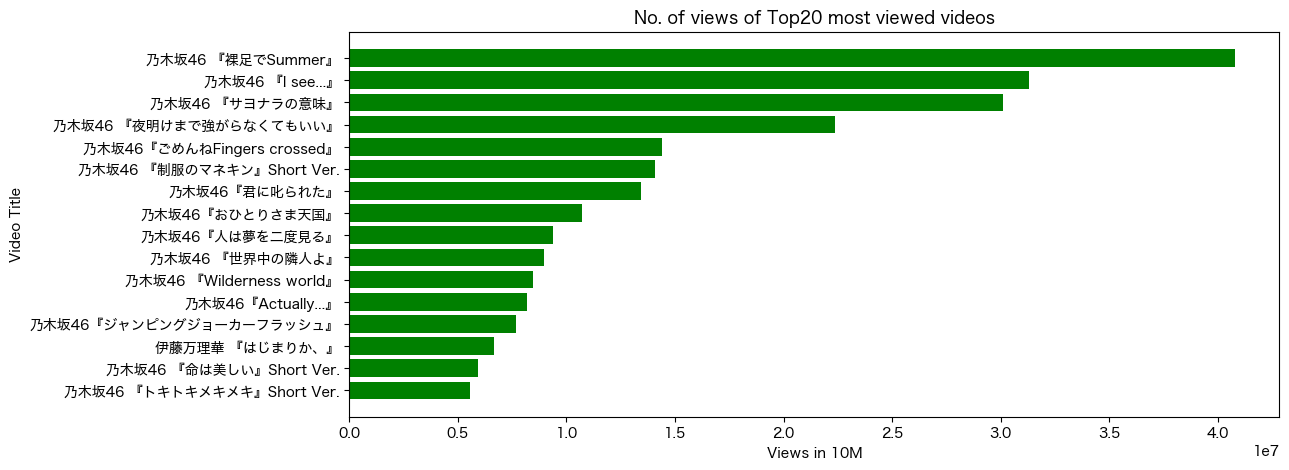

In [26]:
#Plot horizontal bars for views

top20_df = df.sort_values(by=['Views'],ascending=False)[:20]
top20_df["Video Title"] = top20_df["Track Name"].apply(trim_title)

plt.figure(figsize=(12,5))
plt.barh(top20_df['Video Title'], top20_df["Views"], color="green")
plt.xlabel("Views in 10M")
plt.ylabel("Video Title")
plt.title("No. of views of Top20 most viewed videos")

plt.gca().invert_yaxis()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

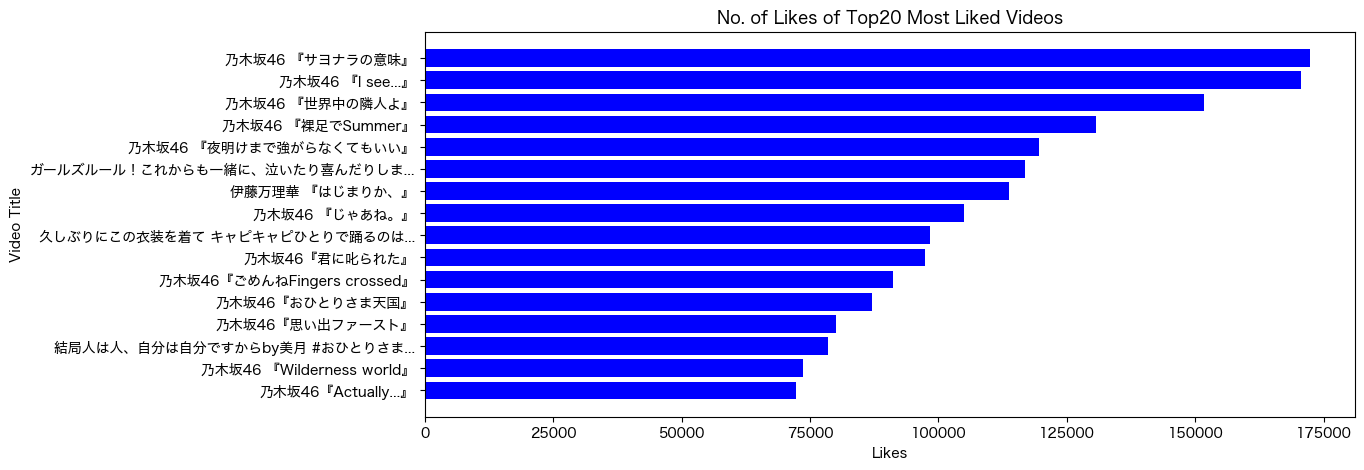

In [27]:
#Plot likes

top20like_df = df.sort_values(by=['Likes'],ascending=False)[:20]
top20like_df["Video Title"] = top20like_df["Track Name"].apply(trim_title)
plt.figure(figsize=(12,5))
plt.barh(top20like_df['Video Title'], top20like_df["Likes"], color="blue")
plt.xlabel("Likes")
plt.ylabel("Video Title")
plt.title("No. of Likes of Top20 Most Liked Videos")

plt.gca().invert_yaxis()
plt.show